# Importing Library

In [15]:
import pandas as pd
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split    
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


# Load DataFrame from CSV file

In [16]:
# Load DataFrame from CSV file
labelled_data = pd.read_csv('labelled_data.csv')
display(labelled_data)

,Unnamed: 0,Label,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,X097_DE_time,0.0,0.053197,0.088662,0.099718,0.058621,-0.004590,-0.056952,-0.071764,-0.058621,...,-0.039637,-0.017315,-0.023574,-0.034004,-0.044852,-0.038802,-0.016689,0.000209,-0.021905,-0.071138
1,X097_DE_time,0.0,-0.054449,-0.035465,-0.011474,0.013560,0.068634,0.118911,0.145822,0.120162,...,0.034004,0.059664,0.078857,0.097006,0.121414,0.160425,0.177532,0.153541,0.095129,0.026077
2,X097_DE_time,0.0,0.012100,-0.046313,-0.103473,-0.118911,-0.086158,-0.041723,-0.011474,-0.005841,...,0.054031,-0.028789,-0.104308,-0.149160,-0.147908,-0.128090,-0.072181,-0.017524,0.034004,0.091791
3,X097_DE_time,0.0,0.009179,-0.034213,-0.038802,-0.016272,-0.000834,-0.006676,-0.001043,0.025660,...,0.006676,-0.040263,-0.057786,-0.032127,-0.007510,0.007719,0.008762,0.019610,0.046730,0.079691
4,X097_DE_time,0.0,0.125586,0.157505,0.167727,0.116199,0.035882,-0.072390,-0.164806,-0.182747,...,0.115573,0.131010,0.136852,0.110983,0.037551,-0.056535,-0.119328,-0.118494,-0.066548,-0.012726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13673,X261_BA_time,11.0,-0.009053,-0.031466,-0.054803,0.018228,0.056373,0.024907,0.087355,0.097334,...,-0.311478,-0.352681,-0.377467,-0.214666,0.040801,0.221547,0.250075,0.135359,0.153988,0.198612
13674,X261_BA_time,11.0,-0.059793,0.001006,0.053355,0.076894,0.048325,-0.036455,-0.039996,-0.045951,...,0.059913,0.058666,-0.011830,0.020481,-0.036053,-0.091218,-0.012071,-0.031506,-0.071462,-0.012836
13675,X261_BA_time,11.0,0.041203,0.003340,0.153787,0.012594,-0.203762,-0.298320,-0.228548,0.035892,...,0.028287,0.040358,0.007645,-0.023941,-0.034564,-0.029212,-0.011025,-0.009295,-0.038708,-0.015089
13676,X261_BA_time,11.0,-0.015894,0.004064,0.061845,-0.007967,0.020964,0.063736,0.024303,0.072226,...,0.073031,0.042249,0.056051,0.084297,0.067599,0.117372,0.079026,-0.004547,-0.003179,-0.031586


# Splitting dataset

In [17]:
# Assuming df is your DataFrame
labelled_data = labelled_data.drop(columns=labelled_data.columns[0])

# Split data into features (X) and labels (y)
X = labelled_data.drop('Label', axis=1)  # Assuming 'Label' is the column with 0 or 1
y = labelled_data['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train)
display(y_train)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
443,0.031918,0.040680,0.081569,0.090539,0.075519,0.027954,-0.003129,0.022739,0.057578,0.096798,...,-0.054240,-0.047564,-0.045270,-0.048607,-0.071764,-0.097841,-0.110358,-0.085532,-0.027746,0.003964
8396,0.130875,-0.190456,0.080538,0.035133,-0.174020,0.097591,0.298320,0.470902,0.152447,-0.049104,...,0.033489,-0.034927,-0.120807,0.069238,0.168267,-0.148749,0.226822,0.003904,0.027325,0.180800
5459,-0.173815,0.319482,0.615747,0.450767,0.069444,-0.212851,-0.211413,-0.213056,-0.079100,-0.105604,...,-0.155735,-0.119164,0.009656,0.018491,0.225589,0.356464,0.160255,-0.111767,-0.052596,0.175869
4731,0.109713,0.059171,-0.120396,0.039858,-0.026915,-0.043351,0.048282,-0.102316,-0.032051,0.106015,...,0.128409,0.203605,0.151420,-0.019313,0.079922,-0.065335,-0.224767,-0.029585,-0.078484,-0.054651
532,-0.020862,-0.061959,-0.058204,-0.018775,0.027120,0.050276,0.045270,0.048816,0.081360,0.081569,...,-0.139981,-0.166684,-0.148743,-0.091791,-0.065088,-0.061542,-0.062793,-0.055492,-0.033587,-0.024408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.402075,-0.004725,-0.106631,-0.074169,0.208947,-0.056705,-0.175458,0.051775,0.041502,-0.024449,...,0.354204,-0.036365,-0.062253,-0.285787,-0.176691,0.194565,-0.086702,-0.308387,0.066773,-0.012327
13418,0.015169,-0.070697,-0.086510,-0.116809,-0.142963,-0.121839,-0.024706,0.072226,0.027482,-0.029373,...,-0.019958,0.006720,0.004748,-0.008812,-0.013359,-0.031747,-0.000523,0.010301,-0.017704,0.003098
5390,-0.076669,-0.238617,-0.152851,0.102172,0.163735,-0.019655,0.077969,0.060426,-0.166009,0.042720,...,-0.085278,-0.145379,0.149928,0.089827,-0.238942,-0.009746,0.346312,0.067248,-0.243653,-0.099248
860,0.080333,0.015820,-0.028969,-0.047255,-0.001644,0.035955,0.036571,0.022189,-0.002055,0.019518,...,0.102727,0.054035,0.003287,-0.000205,0.024860,0.083620,0.082182,0.040680,0.020751,0.043556


443       0.0
8396      9.0
5459      5.0
4731      3.0
532       0.0
         ... 
5191      5.0
13418    11.0
5390      5.0
860       0.0
7270      7.0
Name: Label, Length: 10942, dtype: float64

# Neural Network

In [18]:
# Define the model
model = Sequential()

# Layer 1: 1D Convolution
model.add(Conv1D(filters=64, kernel_size=64, strides=16, padding='same', input_shape=(2048, 1), activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Layer 2: 1D Convolution
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Layer 3: 1D Convolution
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Layer 4: 1D Convolution
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Layer 5: 1D Convolution
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu'))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully Connected Hidden Layer
model.add(Dense(100, activation='relu'))

# Output Layer with 12 units for 12 classes and softmax activation
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 128, 64)           4160      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 64, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 64, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 32, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 32, 64)            6208      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 16, 64)           

# Train Model

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
274/274 [==============================] - 4s 11ms/step - loss: 1.3180 - accuracy: 0.5268 - val_loss: 0.6363 - val_accuracy: 0.7401
Epoch 2/15
274/274 [==============================] - 4s 15ms/step - loss: 0.5292 - accuracy: 0.7868 - val_loss: 0.3743 - val_accuracy: 0.8419
Epoch 3/15
274/274 [==============================] - 5s 20ms/step - loss: 0.3144 - accuracy: 0.8692 - val_loss: 0.2665 - val_accuracy: 0.8817
Epoch 4/15
274/274 [==============================] - 6s 21ms/step - loss: 0.2779 - accuracy: 0.8890 - val_loss: 0.1833 - val_accuracy: 0.9278
Epoch 5/15
274/274 [==============================] - 6s 22ms/step - loss: 0.2051 - accuracy: 0.9291 - val_loss: 0.1864 - val_accuracy: 0.9402
Epoch 6/15
274/274 [==============================] - 6s 21ms/step - loss: 0.1189 - accuracy: 0.9599 - val_loss: 0.1016 - val_accuracy: 0.9667
Epoch 7/15
274/274 [==============================] - 6s 22ms/step - loss: 0.0816 - accuracy: 0.9717 - val_loss: 0.1614 - val_accuracy: 0.9420

# Evaluate Model

In [20]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

86/86 [==============================] - 1s 8ms/step - loss: 0.0366 - accuracy: 0.9868
Test Accuracy: 0.9868420958518982


342/342 [==============================] - 1s 3ms/step


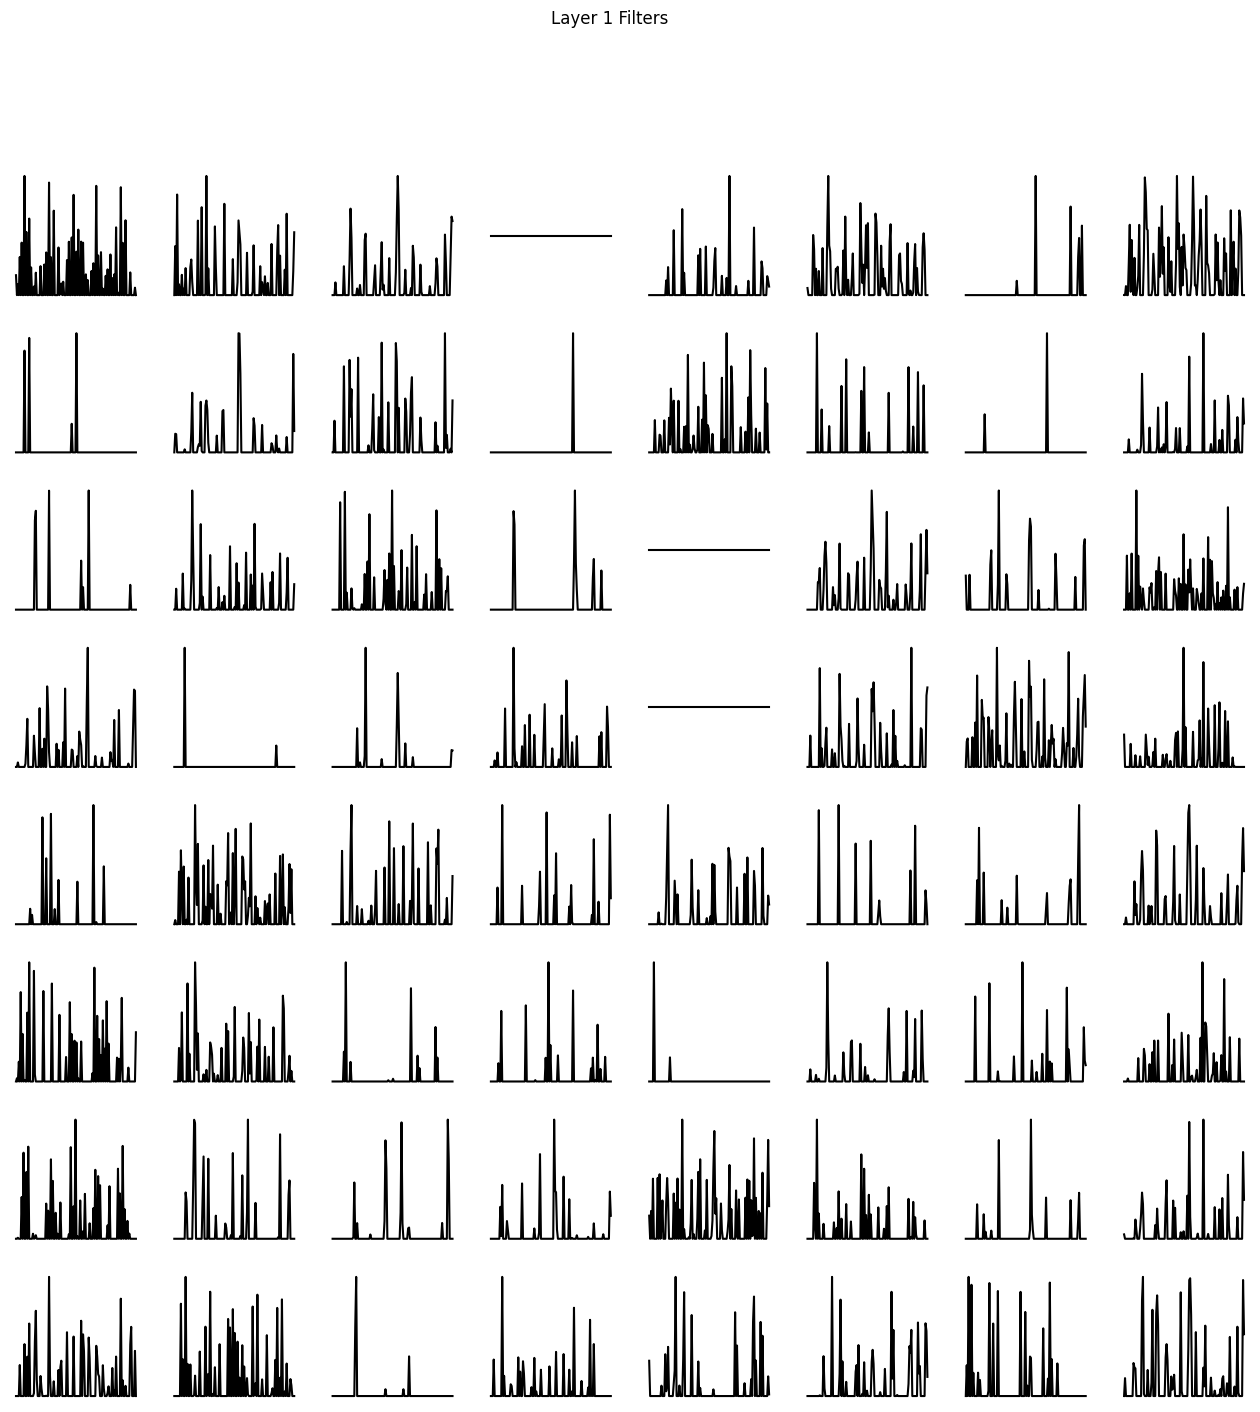

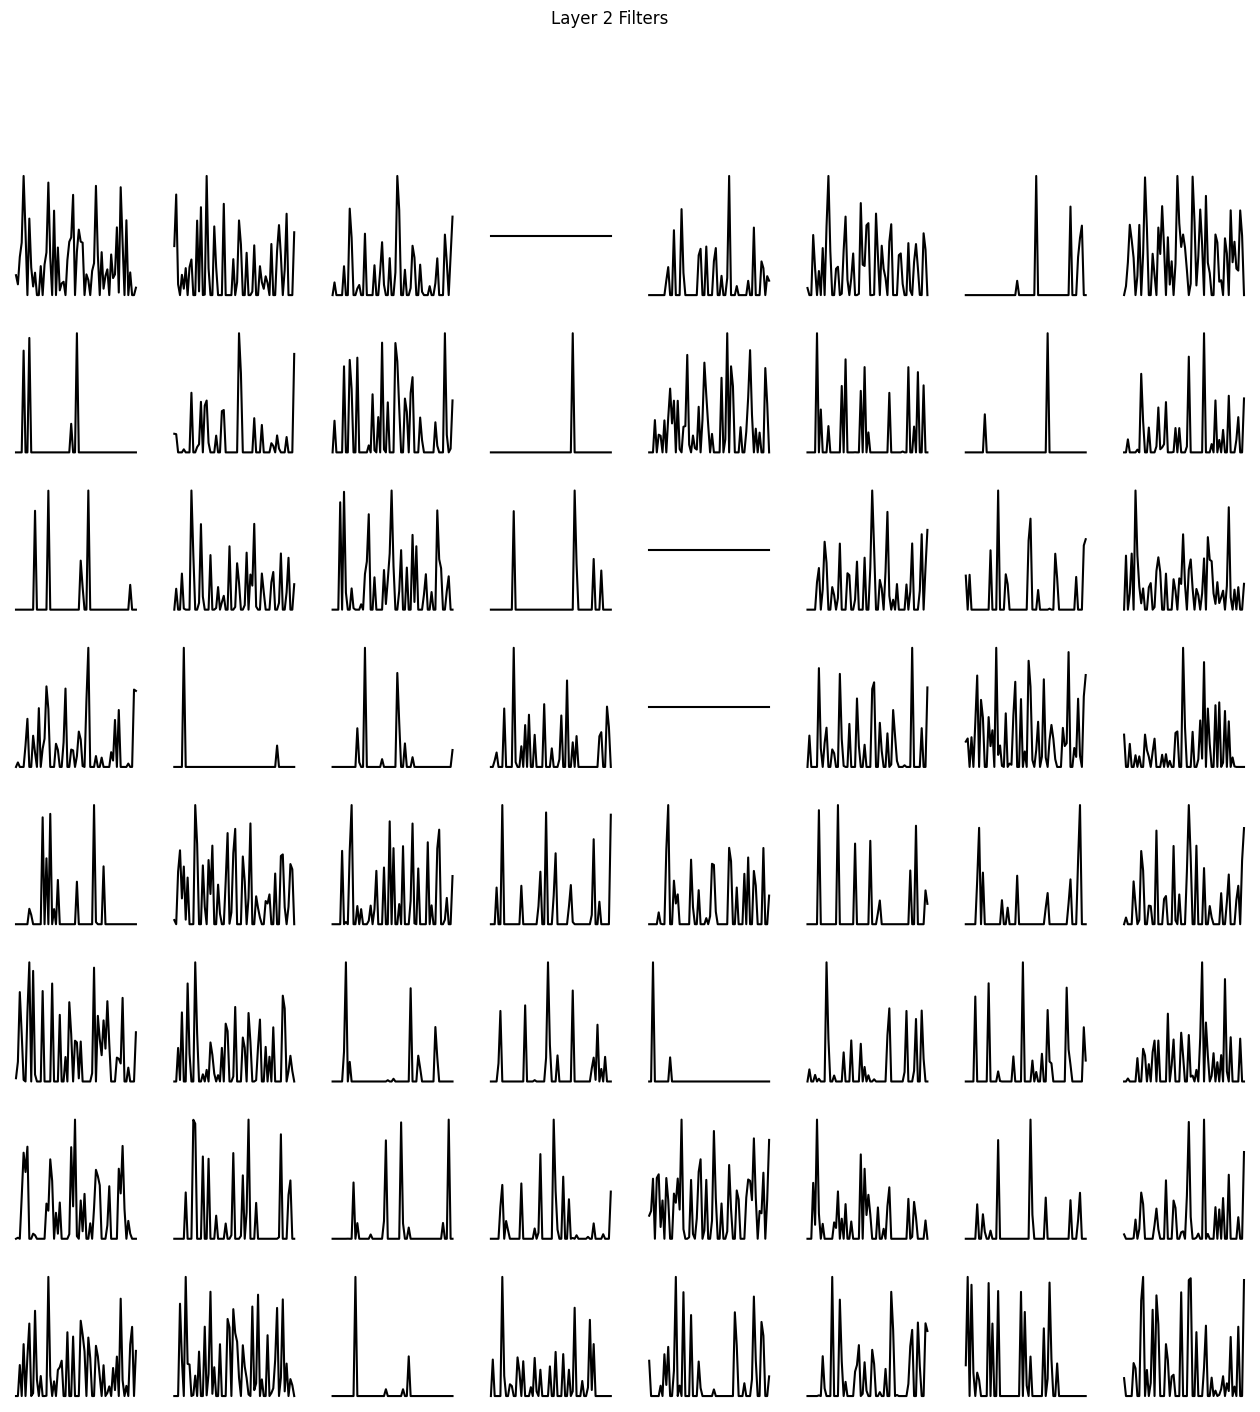

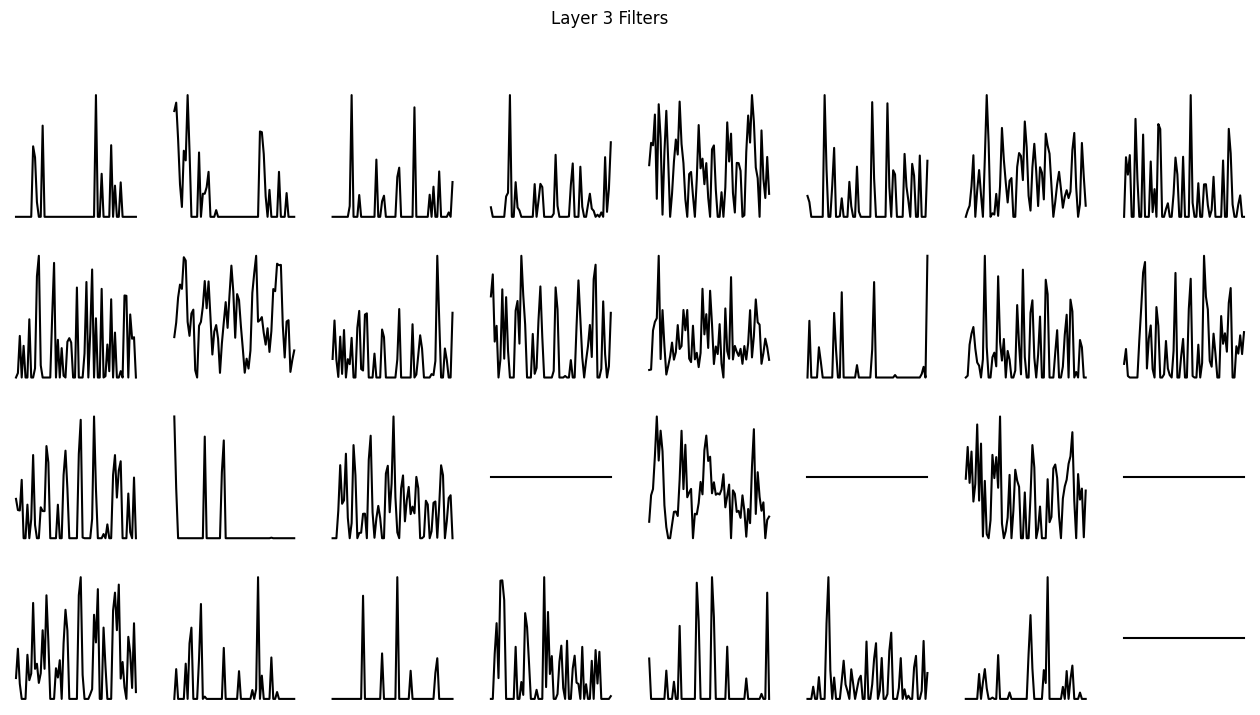

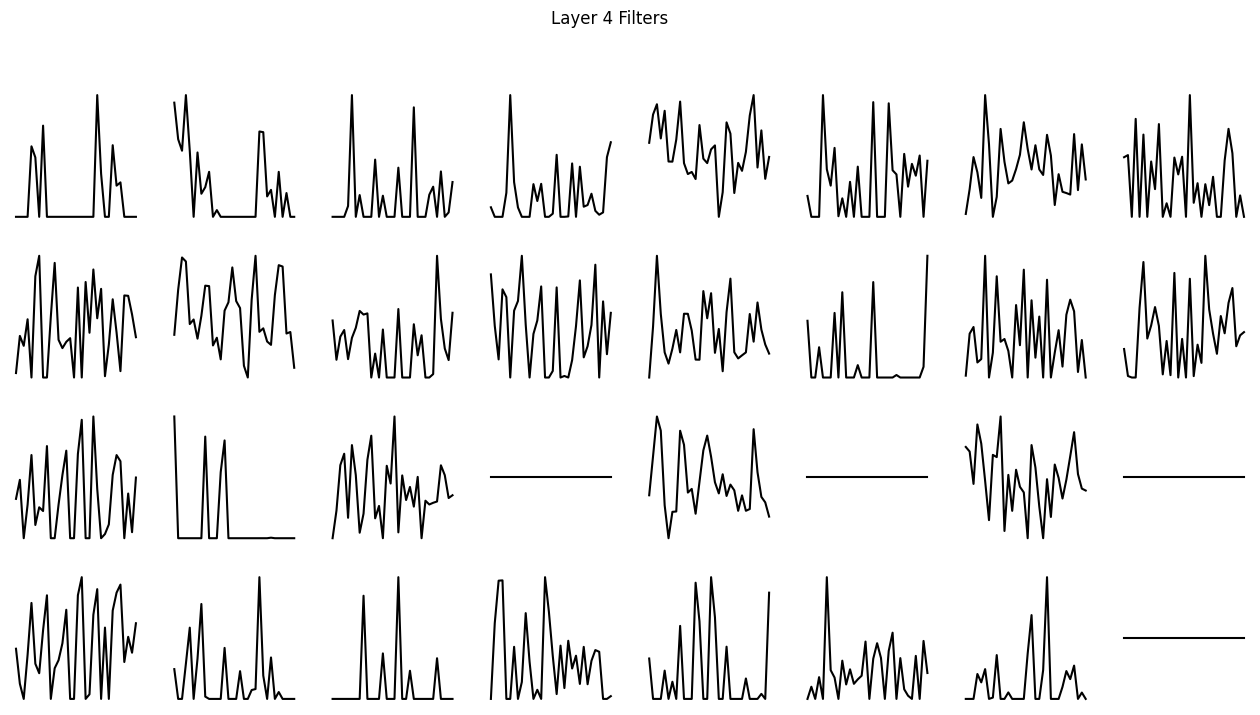

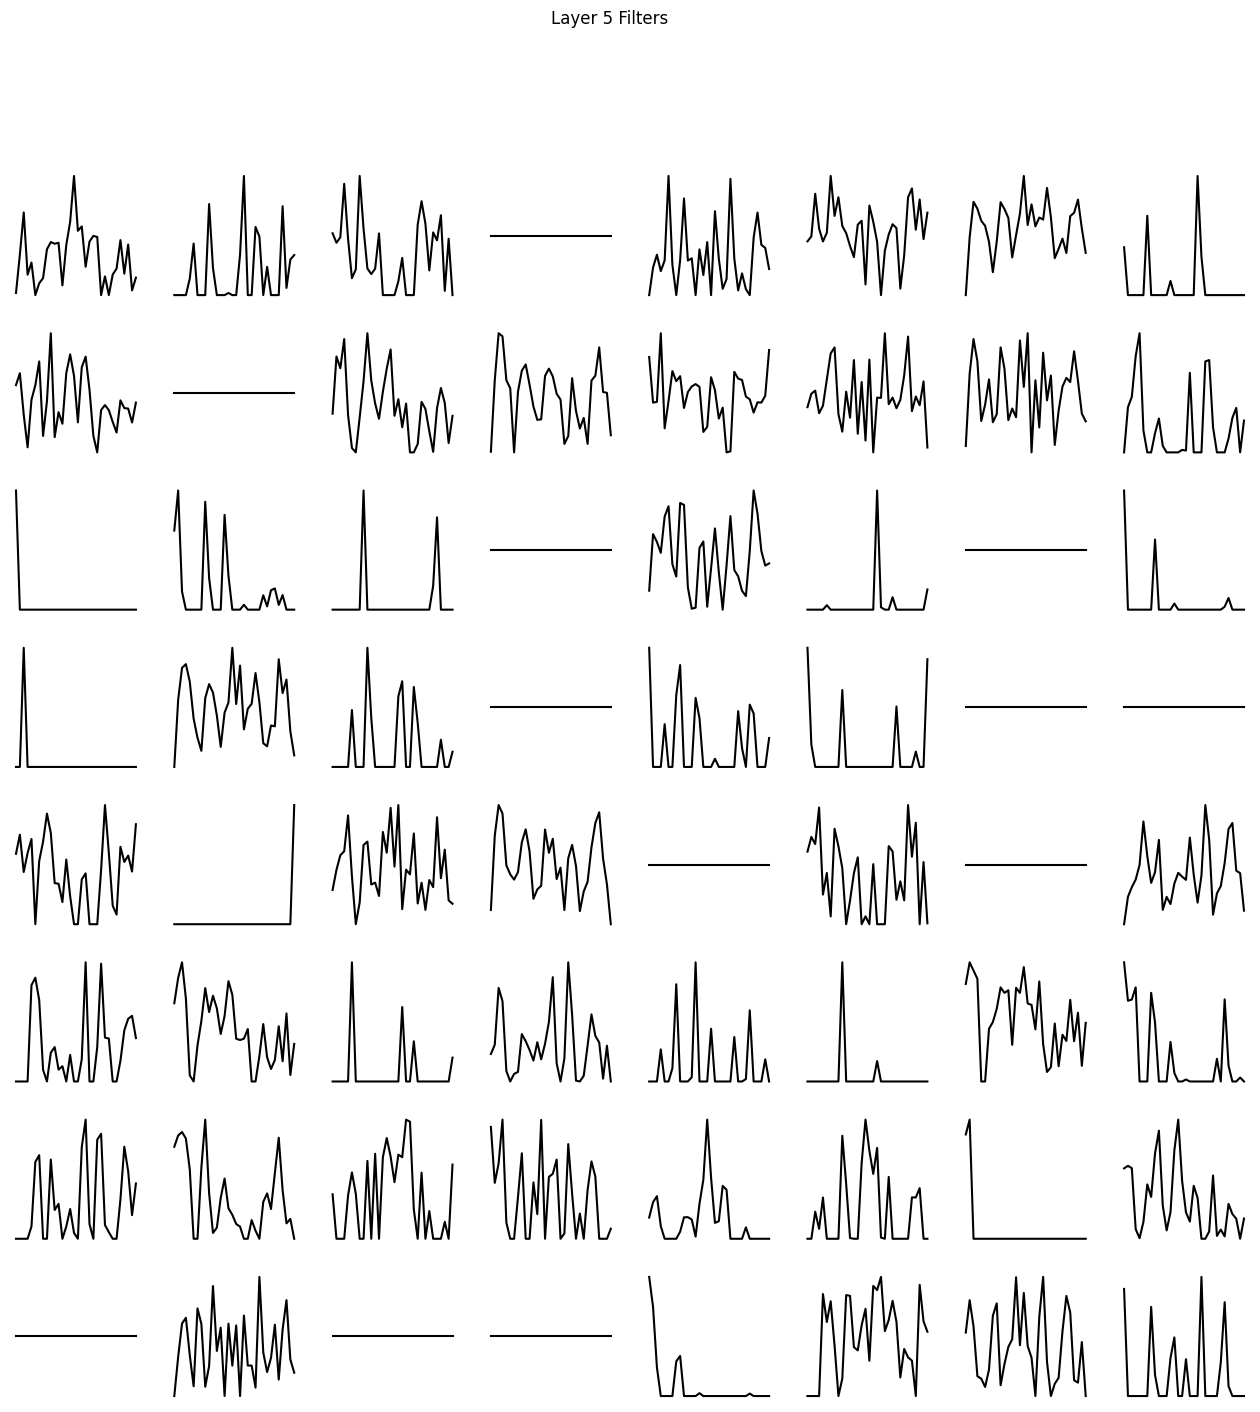

In [23]:
# Extract the output of intermediate layers
layer_outputs = [layer.output for layer in model.layers[:5]]  # Choose N convolutional layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1))

# Visualize filters
for layer_index, activation in enumerate(activations):
    num_filters = activation.shape[-1]
    fig, axes = plt.subplots(num_filters // 8, 8, figsize=(16, 2 * (num_filters // 8)))
    
    for i in range(num_filters):
        row, col = i // 8, i % 8
        ax = axes[row, col]
        ax.plot(activation[0, :, i], color='black')  # Use plot instead of imshow
        ax.axis('off')
    
    plt.suptitle(f'Layer {layer_index + 1} Filters')
    plt.show()


